In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

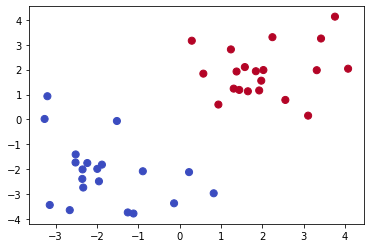

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

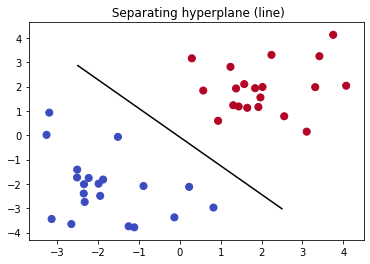

In [3]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

plt.gca()
plt.plot(x1, x2, 'k-')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.get_cmap('coolwarm', 2),s=50)

plt.axis('tight')
plt.title(' Separating hyperplane (line)')
plt.show()

#### b. List the support vectors.

In [4]:
clf.support_vectors_

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

Equation of upper line: y =  -1.1768931608710183 x +  1.698091104461485
Equation of lower line: y =  -1.1768931608710183 x  -1.851807718698718


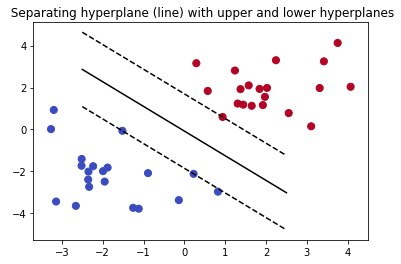

In [5]:
b1 = clf.support_vectors_[0]
x2_down = a * x1 + (b1[1] - a * b1[0])

b2 = clf.support_vectors_[-1]
x2_up = a * x1 + (b2[1] - a * b2[0])

t = b2[1] - a * b2[0]
u = b1[1] - a * b1[0]
print('Equation of upper line: y = ',a,'x + ',t)
print('Equation of lower line: y = ',a,'x ',u)

plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.get_cmap('coolwarm', 2),s=50)

plt.axis('tight')
plt.title(' Separating hyperplane (line) with upper and lower hyperplanes')
plt.show()


#### d. Compute the width of the margin.

In [6]:
margin = abs(t-u)/np.sqrt(a**2+1)
print('Width of margin :',margin)


Width of margin : 2.2986070079527545


#### e. What would you expect to happen to the margin if the constant C was made very small?

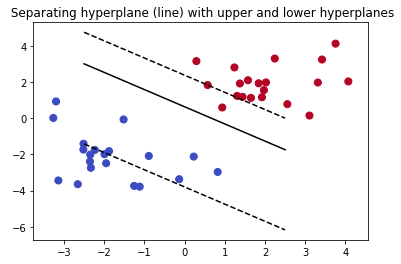

In [7]:
#Taking C to be very very small

from sklearn import svm

clf = svm.SVC(kernel='linear',C=0.000001)  
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

b1 = clf.support_vectors_[0]
x2_down = a * x1 + (b1[1] - a * b1[0])

b2 = clf.support_vectors_[-1]
x2_up = a * x1 + (b2[1] - a * b2[0])

plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.get_cmap('coolwarm', 2),s=50)

plt.axis('tight')
plt.title(' Separating hyperplane (line) with upper and lower hyperplanes')
plt.show()



C parameter also known as misclassification rate helps us in finding the hyperplane which correctly separates as many instances as possible. Low value of C gives us a large minimum margin and we misclassify the instances. For very very small values of C as shown above, we get misclassified examples even when our training data is linearly separable

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

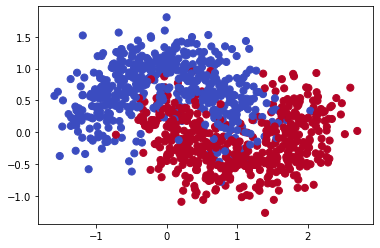

In [8]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [9]:
clf = svm.SVC(kernel='poly') 
clf.fit(X_train, Y_train)

correct_train=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
print ("In sample, the polynomial kernel successfully predicts :",(correct_train)*100,"data")

correct_test=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print ("Out of sample, the polynomial kernel successfully predicts :",(correct_test)*100,"data")

In sample, the polynomial kernel successfully predicts : 81.34328358208955 data
Out of sample, the polynomial kernel successfully predicts : 82.72727272727273 data


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


In [10]:
import math

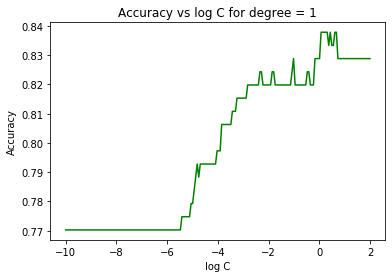

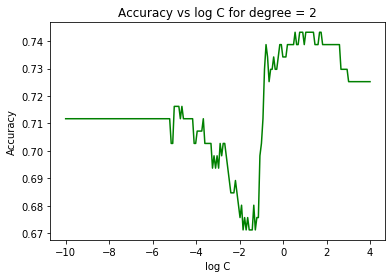

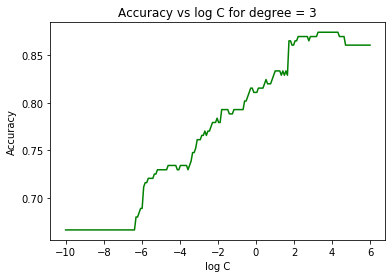

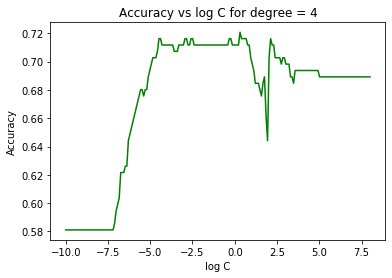

In [11]:
# Denote the remaining training data by (X_train_1, Y_train_1).

X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

max_accuracy =[]
max_logc =[]
deg =[]

for degree in range(1,5):
    C = [math.exp(i) for i in np.linspace(-10,2*degree,200)]
    logc = [np.log(c) for c in C]
    OS_validation = []
 
    
    for z in C:
        clf = svm.SVC(kernel='poly',degree=degree, C = z, gamma='auto') 
        clf.fit(X_train_1, Y_train_1)
        correct_val=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_validation.append(correct_val)
        
    temp=pd.DataFrame([logc,OS_validation]).T # put results together.
    max_accuracy.append(temp.iloc[temp[1].idxmax()][1])
    max_logc.append(temp.iloc[temp[1].idxmax()][0])
    deg.append(degree)
    
    plt.gca()
    plt.plot(logc,OS_validation,'g')
    plt.ylabel('Accuracy')
    plt.xlabel('log C')
    plt.title( 'Accuracy vs log C for degree = ' + str(degree))
    plt.show()


### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [12]:
#Calculating maximum accuracy for d = 1,2,3,4 and their max log C

df = pd.DataFrame(list(zip(deg, max_accuracy, max_logc)),columns = ['degree', 'max_accuracy', 'max_logc'])
df

,degree,max_accuracy,max_logc
0,1,0.837838,0.070352
1,2,0.743243,0.552764
2,3,0.873874,3.266332
3,4,0.720721,0.311558


Degree = 3 has the max accuracy so the optimal degree = 3 and log c = 3.266332. So optimal regularization constant C = 10**3.266332

In [13]:
clf_deg3 = svm.SVC(kernel='poly',degree=3, C = 10**3.266)
clf_deg3.fit(X_train_1, Y_train_1)
 
correct_deg3=1.0*(clf_deg3.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
print ("Final out-of-sample accuracy for degree =3 is : ", correct_deg3*100)

Final out-of-sample accuracy for degree =3 is :  86.03603603603604


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) = 6/11

P(No) = 5/11

P(Red|Yes) =5/6

P(SUV|Yes) = 2/6 =1/3

P(Domestic|Yes) = 3/6 =1/2

P(Red|No) = 2/5

P(SUV|No) = 3/5

P(Domestic|No) = 3/5

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

P(Yes/ Red ∩ Domestic ∩ SUV) = P(Domestic/Yes) P(SUV/Yes) P(Red/Yes) P(Yes) / ( ( P(Domestic/Yes) P(SUV/Yes) P(Red/Yes) P(Yes) ) + ( P(Domestic/No) P(SUV/No) P(Red/No) P(No) ) )

                  = (1/2 x 1/3 x 5/6 x 6/11) / (1/2 x 1/3 x 5/6 x 6/11) + (3/5 x 3/5 x 2/5 x 5/11)
                             
                  = (5/6) / ( 5/6 + 18/25)
                             
                  = 125 / 233
                  
                  = 0.536480

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [14]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

X_train.head()

,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
0,3.0,158.0,64.0,13.0,387.0,31.2,0.295,24.0
1,0.0,84.0,64.0,22.0,66.0,35.8,0.545,21.0
2,9.0,120.0,72.0,22.0,56.0,20.8,0.733,48.0
3,4.0,110.0,76.0,20.0,100.0,28.4,0.118,27.0
4,2.0,100.0,66.0,20.0,90.0,32.9,0.867,28.0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb = gnb.fit(X_train,y_train)
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)


In [16]:
print ('In sample prediction accuracy:',(y_pred_train==y_train).sum()*1.0/len(y_pred_train))

print ('Out of sample prediction accuracy:',(y_pred_test==y_test).sum()*1.0/len(y_pred_test))


In sample prediction accuracy: 0.7584745762711864
Out of sample prediction accuracy: 0.7911392405063291


### b) What is the prior probability of diabetes, learned from the training data?

In [17]:
data_train.head()

,Unnamed: 0,y,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
0,710,0.0,3.0,158.0,64.0,13.0,387.0,31.2,0.295,24.0
1,372,0.0,0.0,84.0,64.0,22.0,66.0,35.8,0.545,21.0
2,460,0.0,9.0,120.0,72.0,22.0,56.0,20.8,0.733,48.0
3,704,0.0,4.0,110.0,76.0,20.0,100.0,28.4,0.118,27.0
4,70,1.0,2.0,100.0,66.0,20.0,90.0,32.9,0.867,28.0


In [18]:
prior_prob = len(data_train.loc[data_train['y'] ==1.0])*1.0 / len(data_train) *1.0
prior_prob

0.3008474576271186

### c) What is the mean and variance of each input variable for patients with diabetes?

In [19]:
diabetespatient = data_train.loc[data_train['y'] ==1]
diabetespatient.head()

,Unnamed: 0,y,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
4,70,1.0,2.0,100.0,66.0,20.0,90.0,32.9,0.867,28.0
6,545,1.0,8.0,186.0,90.0,35.0,225.0,34.5,0.423,37.0
7,110,1.0,3.0,171.0,72.0,33.0,135.0,33.3,0.199,24.0
10,709,1.0,2.0,93.0,64.0,32.0,160.0,38.0,0.674,23.0
13,662,1.0,8.0,167.0,106.0,46.0,231.0,37.6,0.165,43.0


In [20]:
for i in diabetespatient.columns[2:]:
    print ('Mean for variable ', i , ' : ' , diabetespatient[i].mean())
    print ('Variance for variable ', i , ' : ' , diabetespatient[i].var())
    print('\n')

Mean for variable  t_pre  :  4.070422535211268
Variance for variable  t_pre  :  12.380684104627761


Mean for variable  glu  :  144.14084507042253
Variance for variable  glu  :  937.9798792756535


Mean for variable  blood_p  :  74.56338028169014
Variance for variable  blood_p  :  190.42092555331996


Mean for variable  triceps  :  33.478873239436616
Variance for variable  triceps  :  95.31026156941651


Mean for variable  serum  :  209.2112676056338
Variance for variable  serum  :  16108.94044265593


Mean for variable  b_m  :  35.22394366197182
Variance for variable  b_m  :  39.168704225352116


Mean for variable  pedigree_f  :  0.6390422535211271
Variance for variable  pedigree_f  :  0.19275789818913477


Mean for variable  age  :  35.7887323943662
Variance for variable  age  :  105.3404426559356




### d) What is the mean and variance of each input variable for patients without diabetes?

In [21]:
notdiabetespatient = data_train.loc[data_train['y'] ==0]
notdiabetespatient.head()

,Unnamed: 0,y,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
0,710,0.0,3.0,158.0,64.0,13.0,387.0,31.2,0.295,24.0
1,372,0.0,0.0,84.0,64.0,22.0,66.0,35.8,0.545,21.0
2,460,0.0,9.0,120.0,72.0,22.0,56.0,20.8,0.733,48.0
3,704,0.0,4.0,110.0,76.0,20.0,100.0,28.4,0.118,27.0
5,286,0.0,5.0,155.0,84.0,44.0,545.0,38.7,0.619,34.0


In [22]:
for i in notdiabetespatient.columns[2:]:
    print ('Mean for variable ', i , ' : ' , notdiabetespatient[i].mean())
    print ('Variance for variable ', i , ' : ' , notdiabetespatient[i].var())
    print('\n')

Mean for variable  t_pre  :  2.690909090909091
Variance for variable  t_pre  :  6.812416851441231


Mean for variable  glu  :  111.46666666666667
Variance for variable  glu  :  609.6894308943092


Mean for variable  blood_p  :  69.2060606060606
Variance for variable  blood_p  :  137.20118255728022


Mean for variable  triceps  :  27.2
Variance for variable  triceps  :  108.92926829268296


Mean for variable  serum  :  127.0060606060606
Variance for variable  serum  :  8369.713377679238


Mean for variable  b_m  :  31.709090909090893
Variance for variable  b_m  :  40.165343680709526


Mean for variable  pedigree_f  :  0.46868484848484815
Variance for variable  pedigree_f  :  0.08511825373244639


Mean for variable  age  :  28.393939393939394
Variance for variable  age  :  72.88654841093859




## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [23]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print (X_Labeled_train)
print (y_Labeled_train)

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6
0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [24]:
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [25]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)
y_pred_train = testNaiveBayesDiscrete(X_Labeled_train,naive_bayes_classifier)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)



In [26]:
# measure accuracy for the binary prediction task
print ('In sample accuracy:',1.0*sum((y_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train))
print ('Out of sample accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))



In sample accuracy: 1.0
Out of sample accuracy: 0.6944444444444444


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [27]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print ('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled],ignore_index=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled],ignore_index=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [28]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print ('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
Out of sample prediction accuracy: 0.9444444444444444
